# 데이터 및 모듈 불러오기

In [2]:
import pandas as pd
import numpy as np
from matplotlib import rc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample 
from scipy.optimize import minimize
from sklearn.mixture import GaussianMixture
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('fivethirtyeight')
%matplotlib inline
sns.set(font="Verdana")

rawdata = pd.read_csv("Energy Data/seoul_powerusage_data.csv", index_col=None)
rawdata=rawdata.drop(columns=['Unnamed: 0','Year','Month'])
print(rawdata.shape)

rawdata.head()

(99, 25)


,광진구 Power Usage,양천구 Power Usage,도봉구 Power Usage,서대문구 Power Usage,중구 Power Usage,중랑구 Power Usage,송파구 Power Usage,종로구 Power Usage,용산구 Power Usage,은평구 Power Usage,...,영등포구 Power Usage,성북구 Power Usage,마포구 Power Usage,금천구 Power Usage,관악구 Power Usage,강동구 Power Usage,성동구 Power Usage,강북구 Power Usage,구로구 Power Usage,동작구 Power Usage
0,189.15,232.87,220.63,193.39,195.46,200.37,223.35,186.85,217.64,206.80,...,198.58,212.13,196.40,190.56,173.26,210.39,218.32,197.36,208.82,194.67
1,198.32,243.41,236.12,202.48,204.73,211.97,235.13,195.69,226.23,218.16,...,206.92,223.14,205.48,201.78,182.78,223.84,228.28,208.84,219.72,204.28
2,205.93,249.14,244.78,214.99,215.13,220.39,255.81,206.61,235.79,226.33,...,217.70,231.84,212.41,209.14,190.24,233.30,234.82,217.25,227.88,212.23
3,220.62,264.87,263.12,231.71,230.94,237.81,256.92,223.02,253.57,243.12,...,233.51,248.67,228.83,226.29,203.35,249.36,251.73,234.07,243.91,224.82
4,223.33,265.88,266.32,233.44,234.51,242.77,259.30,226.81,257.62,246.93,...,234.46,253.84,231.62,229.08,208.97,251.37,257.23,239.73,246.98,228.51


In [3]:
np.mean(rawdata, axis=0)

광진구 Power Usage    212.02
양천구 Power Usage    260.81
도봉구 Power Usage    243.74
서대문구 Power Usage   228.82
중구 Power Usage     222.02
중랑구 Power Usage    224.10
송파구 Power Usage    260.75
종로구 Power Usage    209.13
용산구 Power Usage    247.55
은평구 Power Usage    236.09
강서구 Power Usage    227.43
서초구 Power Usage    278.79
강남구 Power Usage    262.25
동대문구 Power Usage   219.10
노원구 Power Usage    249.22
영등포구 Power Usage   222.96
성북구 Power Usage    240.56
마포구 Power Usage    231.15
금천구 Power Usage    210.33
관악구 Power Usage    188.71
강동구 Power Usage    238.79
성동구 Power Usage    251.04
강북구 Power Usage    218.13
구로구 Power Usage    233.16
동작구 Power Usage    218.86
dtype: float64

In [3]:
rawdata['Apartment'].unique()

array(['공덕', '오산', '동탄2LH4', '화성 향남휴먼시아', '동작 본동 SH빌', '송파 위례포레샤인',
       '대구 태전휴먼시아 ', '마포 상암월드컵파크', '동작 상도 SH빌'], dtype=object)

In [4]:
dict = {'공덕': '공덕 A 아파트', 
        '오산': '오산 B 아파트', 
        '동탄2LH4': '동탄 C 아파트', 
        '화성 향남휴먼시아': '화성 D 아파트', 
        '동작 본동 SH빌': '동작 E 아파트', 
        '송파 위례포레샤인': '송파 F 아파트',
        '대구 태전휴먼시아 ': '대구 G 아파트', 
        '마포 상암월드컵파크': '마포 H 아파트', 
        '동작 상도 SH빌': '동작 I 아파트'}
rawdata=rawdata.replace({"Apartment": dict})
rawdata

,Apartment,Customer,April,May,June,July
0,공덕 A 아파트,etri04202104885,123.90,135.30,125.70,216.90
1,공덕 A 아파트,etri04202124115,152.90,164.80,185.50,285.80
2,공덕 A 아파트,etri04202127772,140.20,166.10,164.40,207.20
3,공덕 A 아파트,etri04202128241,173.20,183.60,164.20,193.00
4,공덕 A 아파트,etri04202129637,82.30,88.90,94.90,108.20
...,...,...,...,...,...,...
9981,동작 I 아파트,6009083,116.03,131.86,126.58,158.64
9982,동작 I 아파트,6009086,120.62,157.39,182.31,283.28
9983,동작 I 아파트,6009087,154.77,183.98,179.31,211.50
9984,동작 I 아파트,6009088,110.47,132.81,144.66,143.42


In [5]:
df = rawdata.groupby(by='Apartment')[['April','May','June','July']].mean().T
df.index = ['4월', '5월','6월','7월']
df

Apartment,공덕 A 아파트,대구 G 아파트,동작 E 아파트,동작 I 아파트,동탄 C 아파트,마포 H 아파트,송파 F 아파트,오산 B 아파트,화성 D 아파트
4월,197.94,183.45,135.08,134.62,138.68,158.40,167.69,190.13,149.45
5월,200.50,222.37,161.18,163.96,141.57,192.82,204.08,191.22,181.01
6월,214.75,245.98,168.49,173.28,154.78,218.45,236.27,213.79,197.65
7월,296.47,318.25,221.30,229.21,207.33,331.88,343.55,296.58,276.70


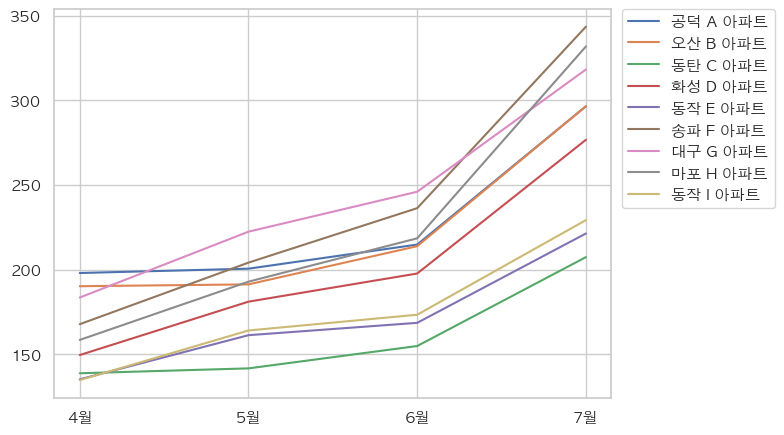

In [6]:
plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')
sns.lineplot(df, dashes=False, hue_order=rawdata['Apartment'].unique())
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# 데이터 확인

In [8]:
for num, i in enumerate(rawdata['Apartment'].unique()):
    print(num+1, i)
    globals()['data_id'+str(num+1)] = rawdata[rawdata['Apartment']==i].reset_index(drop=True)

1 공덕 A 아파트
2 오산 B 아파트
3 동탄 C 아파트
4 화성 D 아파트
5 동작 E 아파트
6 송파 F 아파트
7 대구 G 아파트
8 마포 H 아파트
9 동작 I 아파트


In [9]:
id_number = 1
data = data_id1.copy()
print(data.shape)
data.head()

(184, 6)


,Apartment,Customer,April,May,June,July
0,공덕 A 아파트,etri04202104885,123.90,135.30,125.70,216.90
1,공덕 A 아파트,etri04202124115,152.90,164.80,185.50,285.80
2,공덕 A 아파트,etri04202127772,140.20,166.10,164.40,207.20
3,공덕 A 아파트,etri04202128241,173.20,183.60,164.20,193.00
4,공덕 A 아파트,etri04202129637,82.30,88.90,94.90,108.20


In [159]:
data=rawdata.T

## r값 dirichlet random number로 pair 생성

In [162]:
# r vector 만들어내는 함수
def func_dataframe_r(data):
    data_r = data.copy()
    num_month = data_r.shape[1]
    for col_index in range(0,num_month-1) : 
        data_r['r'+str(col_index+1)] = data_r.iloc[:,col_index+1]/data_r.iloc[:,0]
    data_r = data_r.drop(data_r.columns[range(0, num_month)],axis = 1)
    #df = df.fillna(1)
    #df = df.replace(np.inf, 1)
    r_vector = data_r.iloc[:,:].to_numpy()
    return data_r, r_vector

def func_random_alpha(data):

    # 각 column의 평균과 분산
    means = np.array(data.mean())
    variances = np.array(data.std())

    # 평균과 분산의 비율을 계산하여 alpha 설정
    alpha = means**2 / variances
    
    return alpha

def func_r_combi(length):
    x = np.repeat(np.arange(length), length)
    y = np.tile(np.arange(length), length)
    mask = x < y
    x = x[mask]
    y = y[mask]

    unique_pairs = np.column_stack((x, y))
    unique_pairs = np.unique(unique_pairs, axis=0)

    return unique_pairs

def func_r_s_matrix(data_r, r_vector):
    length = len(r_vector)
    lamb = np.random.dirichlet(func_random_alpha(data_r), func_r_combi(length).shape[0])
    r_s_matrix = lamb * r_vector[func_r_combi(length)[:, 0]] + (1-lamb) * r_vector[func_r_combi(length)[:, 1]]
    columns_name=[f'rs_{i+1}' for i in range(0,98)]
    r_s_df_1 = pd.DataFrame(r_s_matrix, columns=columns_name)
    r_s_df = r_s_df_1.sample(len(r_vector) * 5).reset_index(drop=True)
    return r_s_df

In [163]:
data_r, data_r_vector = func_dataframe_r(data)
r_s_df = func_r_s_matrix(data_r, data_r_vector)
r_s_df


,rs_1,rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9,rs_10,...,rs_89,rs_90,rs_91,rs_92,rs_93,rs_94,rs_95,rs_96,rs_97,rs_98
0,1.05,1.08,1.14,1.17,1.03,1.03,0.98,1.04,1.20,1.64,...,0.99,1.02,0.99,1.09,1.38,1.76,1.49,1.08,1.04,1.09
1,1.06,1.10,1.19,1.21,1.08,1.07,1.00,1.03,1.09,1.43,...,0.95,0.99,0.93,0.98,1.18,1.52,1.33,1.00,0.98,1.04
2,1.06,1.10,1.19,1.20,1.07,1.06,0.99,1.01,1.09,1.46,...,0.96,0.98,0.94,1.01,1.23,1.58,1.35,1.01,0.98,1.05
3,1.05,1.09,1.17,1.18,1.06,1.05,0.99,1.03,1.12,1.51,...,0.99,1.01,0.97,1.02,1.24,1.61,1.37,1.03,1.01,1.07
4,1.05,1.09,1.17,1.20,1.07,1.07,1.00,1.04,1.11,1.45,...,1.02,1.05,0.99,1.05,1.25,1.61,1.45,1.08,1.04,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.05,1.08,1.16,1.18,1.05,1.05,1.00,1.07,1.18,1.64,...,1.04,1.06,1.02,1.12,1.40,1.78,1.52,1.11,1.07,1.15
121,1.05,1.09,1.16,1.17,1.05,1.07,1.00,1.05,1.12,1.52,...,0.98,1.03,0.98,1.05,1.27,1.65,1.42,1.05,1.01,1.07
122,1.06,1.11,1.18,1.19,1.06,1.06,0.98,1.03,1.12,1.50,...,1.01,1.04,1.00,1.09,1.35,1.71,1.45,1.07,1.05,1.06
123,1.05,1.08,1.15,1.18,1.05,1.05,0.97,1.02,1.10,1.47,...,1.01,1.04,0.99,1.07,1.29,1.68,1.52,1.10,1.04,1.10


In [146]:
data

,0,1,2,3,4,5,6,7,8,9
광진구 Power Usage,189.15,198.32,205.93,220.62,223.33,198.79,198.48,186.48,198.21,218.19
양천구 Power Usage,232.87,243.41,249.14,264.87,265.88,241.92,242.14,228.71,235.62,257.89
도봉구 Power Usage,220.63,236.12,244.78,263.12,266.32,236.71,236.51,220.30,228.15,243.40
서대문구 Power Usage,193.39,202.48,214.99,231.71,233.44,210.53,209.69,198.28,205.95,222.83
중구 Power Usage,195.46,204.73,215.13,230.94,234.51,206.95,203.44,193.20,205.19,227.29
중랑구 Power Usage,200.37,211.97,220.39,237.81,242.77,215.97,214.18,200.63,208.15,223.83
송파구 Power Usage,223.35,235.13,255.81,256.92,259.30,232.24,233.52,220.38,231.56,252.78
종로구 Power Usage,186.85,195.69,206.61,223.02,226.81,201.10,197.92,185.81,195.64,214.74
용산구 Power Usage,217.64,226.23,235.79,253.57,257.62,227.87,225.85,213.23,231.02,258.28
은평구 Power Usage,206.80,218.16,226.33,243.12,246.93,221.86,221.10,208.09,213.05,226.98


# 2. First month 분포추정

In [164]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(1)
X = np.array(data[0])[:, np.newaxis]
print(X.shape)

# 실험적으로 여러 개의 구성 요소 수에 대해 모델을 학습하고 AIC 또는 BIC 값을 계산
n_components = np.arange(2, 10)
models = [GaussianMixture(n, random_state=42).fit(X) for n in n_components]
aic_values = [model.aic(X) for model in models]
bic_values = [model.bic(X) for model in models]

# AIC 또는 BIC 값이 최소가 되는 구성 요소의 수 선택
optimal_components_aic = n_components[np.argmin(aic_values)]
optimal_components_bic = n_components[np.argmin(bic_values)]
print(optimal_components_aic)
print(optimal_components_bic)

(25, 1)
8
3


(25, 1)


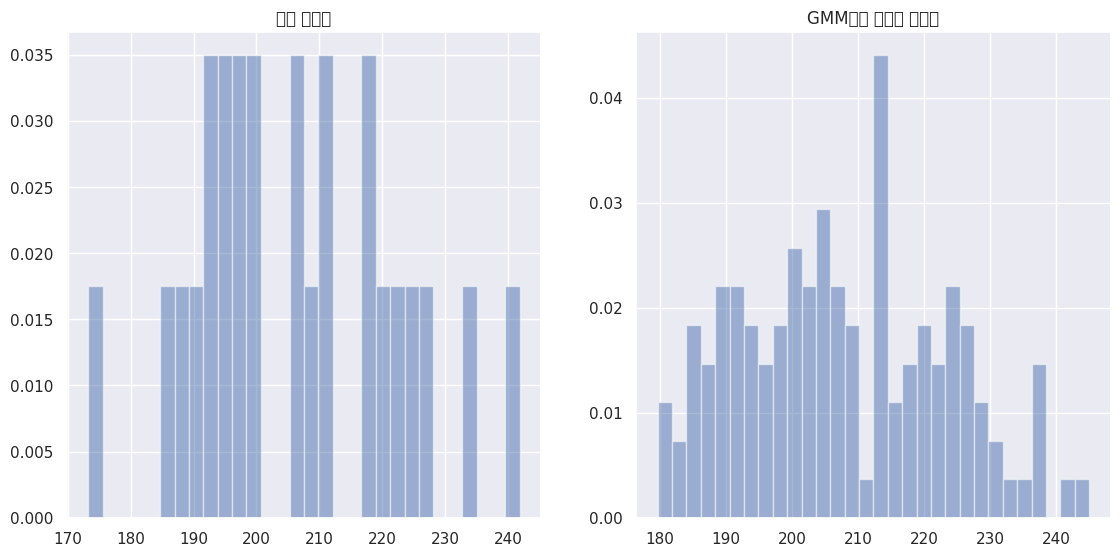

In [165]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(1)
X = np.array(data[0])[:, np.newaxis]
print(X.shape)

# GMM 모델 생성 및 학습
n_components = 2  # GMM의 구성 요소 수
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

# GMM으로부터 샘플 생성
n_samples_generated = data_r.shape[0] * 5
X_generated, _ = gmm.sample(n_samples_generated)
X_generated[X_generated < 0] = 0

# 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("원본 데이터")
plt.hist(X, bins=30, density=True, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title("GMM에서 생성한 데이터")
plt.hist(X_generated, bins=30, density=True, alpha=0.5)

plt.show()


In [166]:
from scipy.stats import ks_2samp

# 원본 데이터
observed_data = data[0]

# GMM에서 생성된 데이터
generated_data = X_generated.flatten()

# KS 검정 수행
ks_statistic, ks_p_value = ks_2samp(observed_data, generated_data)

# 결과 출력
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

# 가설 검정 결과 해석
threshold = 0.05
if ks_p_value < threshold:
    print("GMM으로 생성된 데이터와 원본 데이터 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("GMM으로 생성된 데이터와 원본 데이터 간에는 통계적으로 유의한 차이가 없습니다.")

KS Statistic: 0.128
P-value: 0.8588638081494032
GMM으로 생성된 데이터와 원본 데이터 간에는 통계적으로 유의한 차이가 없습니다.


In [149]:
for (num, col) in enumerate(r_s_df.columns):
    print(num+1)
    print(col)

1
rs_1
2
rs_2
3
rs_3
4
rs_4
5
rs_5
6
rs_6
7
rs_7
8
rs_8
9
rs_9


In [167]:
syn_df = pd.DataFrame(X_generated).rename(columns={0:'0'})
for (num, col) in enumerate(r_s_df.columns):
    syn_df[f'{num+1}'] = syn_df['0']*r_s_df[col]
print(syn_df.shape)
syn_df.tail()

(125, 99)


,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
120,191.88,200.79,207.71,223.51,226.25,202.02,201.58,191.36,205.50,226.65,...,198.71,203.12,195.00,214.32,269.41,342.00,291.13,213.16,205.36,220.50
121,213.52,224.08,232.78,246.64,250.66,224.27,227.40,213.39,223.15,240.12,...,209.10,218.88,208.88,224.11,271.36,352.33,303.52,224.05,216.60,228.92
122,202.37,215.24,224.32,239.76,241.73,215.41,214.56,197.85,207.90,226.74,...,205.03,211.17,202.15,220.82,273.11,346.33,292.49,215.90,212.04,213.66
123,199.86,209.02,215.02,230.51,235.53,210.18,209.45,194.49,204.42,220.59,...,202.73,207.95,198.53,213.78,258.45,335.89,303.12,219.54,207.02,219.99
124,188.71,200.60,209.11,223.54,225.24,200.81,200.01,184.50,194.03,211.66,...,191.24,196.95,188.56,206.03,254.89,323.22,272.80,201.36,197.76,199.31


In [168]:
syn_df.to_csv('C:/Users/wjswp/Desktop/발표자료/syn_ds.csv',index=None)

In [169]:
rawdata.to_csv('C:/Users/wjswp/Desktop/발표자료/original.csv',index=None)

In [178]:
rawdata=rawdata.T

In [185]:
import os

In [187]:
dir='C:/Users/wjswp/Desktop/발표자료/dataset/ds_energy_시점별_plot'
if not os.path.exists(dir):
    os.makedirs(dir)
for i in range(1,100):    
    plt.figure()
    sns.kdeplot(syn_df[str(i-1)],label='synthetic_data',shade=True)
    sns.kdeplot(rawdata[i-1],label='real_data',shade=True)
    plt.legend()
    plt.title(f'timestamp_{i}')

    file_path=os.path.join(dir,f'timestamp_{i}.png')
    plt.savefig(file_path)
    plt.close()

print("finish")


finish


In [204]:
syn_min=syn_df.min().to_list()
syn_max=syn_df.max().to_list()
raw_min=rawdata.min().to_list()
raw_max=rawdata.max().to_list()

In [206]:
min_max_df=pd.DataFrame({
    'syn_min': syn_min,
    'syn_max': syn_max,
    'raw_min': raw_min,
    'raw_max': raw_max
})

min_max_df=min_max_df.T
min_max_df

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
syn_min,179.65,186.88,194.27,209.42,204.35,188.19,186.52,176.09,182.19,196.66,...,171.55,176.94,169.01,180.80,216.31,280.14,236.51,181.80,177.19,187.47
syn_max,245.01,257.15,267.14,283.05,287.72,257.38,261.04,244.90,259.02,289.59,...,250.37,255.90,245.69,270.03,339.48,430.87,366.69,268.55,258.75,277.85
raw_min,173.26,182.78,190.24,203.35,208.97,185.23,186.04,173.36,180.89,194.68,...,158.37,164.38,156.11,169.76,205.98,266.76,230.15,169.92,163.65,173.14
raw_max,241.87,253.05,261.02,274.40,282.75,249.49,247.94,236.97,251.82,290.19,...,239.70,245.79,239.14,262.94,334.58,426.78,360.89,261.14,252.27,264.35


In [208]:
min_max_df.to_csv('C:/Users/wjswp/Desktop/발표자료/dataset/min_max_df.csv')

# Loop

In [ ]:
# r vector 만들어내는 함수
def func_dataframe_r(data):
    data_r = data.copy()
    num_month = data_r.shape[1] - 2
    for col_index in range(2,num_month+1) : 
        data_r['r'+str(col_index-1)] = data_r.iloc[:,col_index+1]/data_r.iloc[:,2]
    data_r = data_r.drop(data_r.columns[range(0, num_month+2)],axis = 1)
    #df = df.fillna(1)
    #df = df.replace(np.inf, 1)
    r_vector = data_r.iloc[:,[0,1,2]].to_numpy()
    return data_r, r_vector

def func_random_alpha(data):

    # 각 column의 평균과 분산
    means = np.array(data.mean())
    variances = np.array(data.std())

    # 평균과 분산의 비율을 계산하여 alpha 설정
    alpha = means**2 / variances
    
    return alpha

def func_r_combi(length):
    x = np.repeat(np.arange(length), length)
    y = np.tile(np.arange(length), length)
    mask = x < y
    x = x[mask]
    y = y[mask]

    unique_pairs = np.column_stack((x, y))
    unique_pairs = np.unique(unique_pairs, axis=0)

    return unique_pairs

def func_r_s_matrix(data_r, r_vector):
    length = len(r_vector)
    lamb = np.random.dirichlet(func_random_alpha(data_r), func_r_combi(length).shape[0])
    r_s_matrix = lamb * r_vector[func_r_combi(length)[:, 0]] + (1-lamb) * r_vector[func_r_combi(length)[:, 1]]
    r_s_df = pd.DataFrame(r_s_matrix, columns=['rs_1', 'rs_2', 'rs_3']).sample(len(r_vector)*5).reset_index(drop=True)

    return r_s_df

In [23]:
id_number = 9
data = data_id9.copy()
print(data.shape)
print(data.shape[0]*5)

for i in range(50):
    if i % 10 == 0 : print(i)
    data_r, data_r_vector = func_dataframe_r(data)
    r_s_df = func_r_s_matrix(data_r, data_r_vector)

    np.random.seed(1)
    X = np.array(data['April'])[:, np.newaxis]
    #print(X.shape)

    # GMM 모델 생성 및 학습
    n_components = 2  # GMM의 구성 요소 수
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X)

    # GMM으로부터 샘플 생성
    n_samples_generated = data_r.shape[0] * 5
    X_generated, _ = gmm.sample(n_samples_generated)
    X_generated[X_generated < 0] = 0

    syn_df = pd.DataFrame(X_generated).rename(columns={0:'April'})
    for month, (num, col) in zip(['May', 'June', 'July', 'August'], enumerate(r_s_df.columns)):
        syn_df[str(month)] = syn_df['April']*r_s_df[col]
    #print(syn_df.shape)
    syn_df.to_csv('aug_synth_data/apt_{}/data{}.csv'.format(id_number, i+1),index=None)
print(syn_df.shape)

(833, 6)
4165
0
10
20
30
40
(4165, 4)
